# Submitted by Chirag Kapil 3414 Comp A

***'
Mini Project 1 Deep Learning
Face Recogntion
'***

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/opencv-facial-recognition-lbph/yalefaces/test/subject03.glasses.gif
/kaggle/input/opencv-facial-recognition-lbph/yalefaces/test/subject12.normal.gif
/kaggle/input/opencv-facial-recognition-lbph/yalefaces/test/subject02.leftlight.gif
/kaggle/input/opencv-facial-recognition-lbph/yalefaces/test/subject13.sad.gif
/kaggle/input/opencv-facial-recognition-lbph/yalefaces/test/subject06.leftlight.gif
/kaggle/input/opencv-facial-recognition-lbph/yalefaces/test/subject11.glasses.gif
/kaggle/input/opencv-facial-recognition-lbph/yalefaces/test/subject02.centerlight.gif
/kaggle/input/opencv-facial-recognition-lbph/yalefaces/test/subject14.sad.gif
/kaggle/input/opencv-facial-recognition-lbph/yalefaces/test/subject14.normal.gif
/kaggle/input/opencv-facial-recognition-lbph/yalefaces/test/subject04.surprised.gif
/kaggle/input/opencv-facial-recognition-lbph/yalefaces/test/subject01.happy.gif
/kaggle/input/opencv-facial-recognition-lbph/yalefaces/test/subject09.rightlight.gif
/kaggle/input/o

In [ ]:
pip install mtcnn

     |████████████████████████████████| 2.3 MB 567 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [ ]:
from matplotlib import pyplot as plt
import cv2
from PIL import Image

import mtcnn
from mtcnn.mtcnn import MTCNN
from matplotlib.patches import Rectangle

from os import listdir
from tqdm import tqdm
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [ ]:
DIRECTORY = "../input/opencv-facial-recognition-lbph/yalefaces/"
DIRECTORY_train='../input/opencv-facial-recognition-lbph/yalefaces/train/'
DIRECTORY_test='../input/opencv-facial-recognition-lbph/yalefaces/test/'

# 1.Data Analysis

# 1) Data Sample

(243, 320, 3)


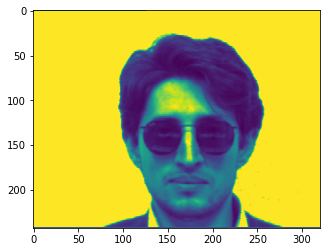

In [ ]:
filename = "../input/opencv-facial-recognition-lbph/yalefaces/test/subject03.glasses.gif"
pixels = plt.imread(filename)

rgb_pixels = np.stack((pixels, pixels, pixels), axis=2)
print(rgb_pixels.shape)
plt.imshow(pixels)
plt.show()

# 2) MTCNN

In [ ]:
detector = MTCNN()

results = detector.detect_faces(rgb_pixels)
results


User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

[{'box': [115, 90, 110, 134],
  'confidence': 0.9997938275337219,
  'keypoints': {'left_eye': (147, 140),
   'right_eye': (198, 138),
   'nose': (174, 169),
   'mouth_left': (151, 192),
   'mouth_right': (195, 193)}}]

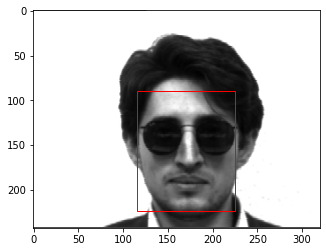

In [ ]:
def draw_image_with_boxes(data, result_list):
    plt.imshow(data)
    ax = plt.gca()
    for result in result_list:
        x, y, width, height = result['box']
        rect = Rectangle((x, y), width, height, fill=False, color='red')
        ax.add_patch(rect)
    plt.show()

draw_image_with_boxes(rgb_pixels, results)

# 3) Extract and normalise the face pixels

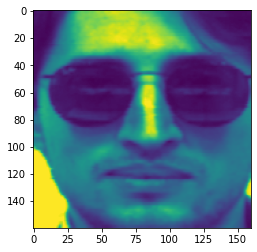

In [ ]:
def extract_face_from_file(filename, required_size=(160, 160)):
    image = Image.open(filename)
    
    return extract_face(image, required_size)

def extract_face(image, required_size=(160, 160)):
    image = image.convert('RGB')
    pixels = np.asarray(image)
    results = detector.detect_faces(pixels)

    x1, y1, width, height = results[0]['box']
    
    x1, y1 = abs(x1), abs(y1)
    x2, y2 = x1 + width, y1 + height

    face = pixels[y1:y2, x1:x2]

    image = Image.fromarray(face)
    image = image.resize(required_size)
    face_array = np.asarray(image)
    gray_face = cv2.cvtColor(face_array, cv2.COLOR_BGR2GRAY)
    
    return gray_face

detector = MTCNN()

face_pixels = extract_face_from_file("../input/opencv-facial-recognition-lbph/yalefaces/test/subject03.glasses.gif")

plt.imshow(face_pixels)

# 2.Data set　〜　135 train datas and 30 test datas

In [ ]:
def list_files(directory, contains):
    return list(f for f in listdir(directory) if contains in f)

100%|██████████| 16/16 [00:09<00:00,  1.70it/s]


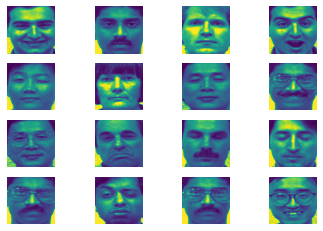

In [ ]:
i = 1
faces = list()
for filename in tqdm(list_files(DIRECTORY_train, "subject")[0:16]):
    # path
    path = DIRECTORY_train + filename
    # get face
    face = extract_face_from_file(path)
    # plot
    plt.subplot(4, 4, i)
    plt.axis('off')
    plt.imshow(face)
    faces.append(face)
    i += 1
plt.show()

In [ ]:
filenames = pd.DataFrame(list_files(DIRECTORY_train, "subject"))

df_train = filenames[0].str.split(".", expand=True)
df_train["filename"] = filenames

df_train = df_train.rename(columns = {0:"subject", 1:"category"})
df_train['subject'] = df_train.subject.str.replace('subject' , '')
df_train.apply(pd.to_numeric, errors='coerce').dropna()
df_train['subject'] = pd.to_numeric(df_train["subject"])
df_train

,subject,category,2,filename
0,15,happy,gif,subject15.happy.gif
1,13,noglasses,gif,subject13.noglasses.gif
2,1,normal,gif,subject01.normal.gif
3,15,surprised,gif,subject15.surprised.gif
4,14,wink,gif,subject14.wink.gif
...,...,...,...,...
130,5,sad,gif,subject05.sad.gif
131,3,surprised,gif,subject03.surprised.gif
132,4,sad,gif,subject04.sad.gif
133,7,normal,gif,subject07.normal.gif


In [ ]:
filenames2 = pd.DataFrame(list_files(DIRECTORY_test, "subject"))

df_test = filenames2[0].str.split(".", expand=True)
df_test["filename"] = filenames2

df_test = df_test.rename(columns = {0:"subject", 1:"category"})
df_test['subject'] = df_test.subject.str.replace('subject' , '')
df_test.apply(pd.to_numeric, errors='coerce').dropna()
df_test['subject'] = pd.to_numeric(df_test["subject"])
df_test

,subject,category,2,filename
0,3,glasses,gif,subject03.glasses.gif
1,12,normal,gif,subject12.normal.gif
2,2,leftlight,gif,subject02.leftlight.gif
3,13,sad,gif,subject13.sad.gif
4,6,leftlight,gif,subject06.leftlight.gif
5,11,glasses,gif,subject11.glasses.gif
6,2,centerlight,gif,subject02.centerlight.gif
7,14,sad,gif,subject14.sad.gif
8,14,normal,gif,subject14.normal.gif
9,4,surprised,gif,subject04.surprised.gif


In [ ]:
x_train=df_train.loc[:,['category','filename']]
x_test=df_test.loc[:,['category','filename']]
y_train=df_train.loc[:,['subject']]
y_test=df_test.loc[:,['subject']]

In [ ]:
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

In [ ]:
y_train = y_train.tolist()
y_test = y_test.tolist()

In [ ]:
detector = MTCNN()

def load_dataset1(dataset):
    faces = list()
    for filename in tqdm(dataset["filename"]):
        path = DIRECTORY_train + filename
        # get face
        face = extract_face_from_file(path)
        faces.append(face)
    return np.asarray(faces)

In [ ]:
detector = MTCNN()

def load_dataset2(dataset):
    faces = list()
    for filename in tqdm(dataset["filename"]):
        path = DIRECTORY_test + filename
        # get face
        face = extract_face_from_file(path)
        faces.append(face)
    return np.asarray(faces)

In [ ]:
x_test = load_dataset2(x_test)
x_train = load_dataset1(x_train)

print(x_test.shape)
print(x_train.shape)

100%|██████████| 135/135 [01:17<00:00,  1.74it/s]

(30, 160, 160)
(135, 160, 160)


# 3. Convolutional Neural Network Model

In [ ]:
TRAINING_DATA_DIRECTORY = "data/train"
TESTING_DATA_DIRECTORY = "data/test"
NUM_CLASSES = 15
EPOCHS = 25
BATCH_SIZE = 20
NUMBER_OF_TRAINING_IMAGES = 135
NUMBER_OF_TESTING_IMAGES = 30
IMAGE_HEIGHT = 160
IMAGE_WIDTH = 160

In [ ]:
import os 

def save_keras_dataset(setname, dataset, labels, per_class):
    data = sorted(list(zip(labels, dataset)), key=lambda x: x[0])

    j = 0
    for label, gray_img in tqdm(data):
        j = (j% per_class) + 1
        
        directory = f"data/{setname}/class_{label}/"
        if not os.path.exists(directory):
                os.makedirs(directory)
        cv2.imwrite(f"{directory}class_{label}_{j}.png",gray_img)

In [ ]:
import shutil
shutil.rmtree(r'data', ignore_errors=True)

# Save datasets
save_keras_dataset("test", x_test, y_test, 3)
save_keras_dataset("train", x_train, y_train, 8)

100%|██████████| 135/135 [00:00<00:00, 1877.72it/s]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def data_generator():
    return ImageDataGenerator(
        rescale=1./255,
        
    )

def add_noise(img):
    """Add random noise to an image"""
    VARIABILITY = 35
    deviation = VARIABILITY*random.random()
    noise = np.random.normal(0, deviation, img.shape)
    img += noise
    np.clip(img, 0., 255.)
    return img

In [ ]:
training_generator = data_generator().flow_from_directory(
    TRAINING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='grayscale'
)

testing_generator = data_generator().flow_from_directory(
    TESTING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    color_mode='grayscale'
)

validation_generator = data_generator().flow_from_directory(
    TESTING_DATA_DIRECTORY,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    class_mode='categorical',
    color_mode='grayscale',
    shuffle=False
)

Found 120 images belonging to 15 classes.
Found 30 images belonging to 15 classes.
Found 30 images belonging to 15 classes.


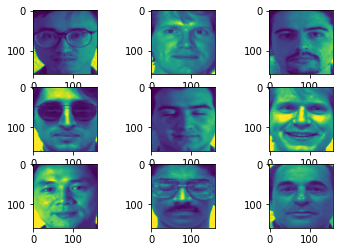

In [ ]:
sample_images = testing_generator.next()[0]

f, xyarr = plt.subplots(3,3)
xyarr[0,0].imshow(sample_images[0])
xyarr[0,1].imshow(sample_images[1])
xyarr[0,2].imshow(sample_images[2])
xyarr[1,0].imshow(sample_images[3])
xyarr[1,1].imshow(sample_images[4])
xyarr[1,2].imshow(sample_images[5])
xyarr[2,0].imshow(sample_images[6])
xyarr[2,1].imshow(sample_images[7])
xyarr[2,2].imshow(sample_images[8])
plt.show()

In [ ]:
import keras
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras.layers import Activation, ZeroPadding2D, MaxPooling2D, Conv2D, Flatten, Dense, Dropout
from tensorflow.keras import regularizers, constraints

model = models.Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='linear', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 1), padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(l2=0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512, activation='relu', kernel_initializer="glorot_uniform", kernel_regularizer=regularizers.l2(l2=0.01)))

model.add(MCDropout(rate=0.5))

model.add(Dense(NUM_CLASSES, activation='softmax', kernel_initializer="glorot_uniform"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 160, 160, 32)      320       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 78, 78, 64)        18496     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 18, 18, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 41472)             0

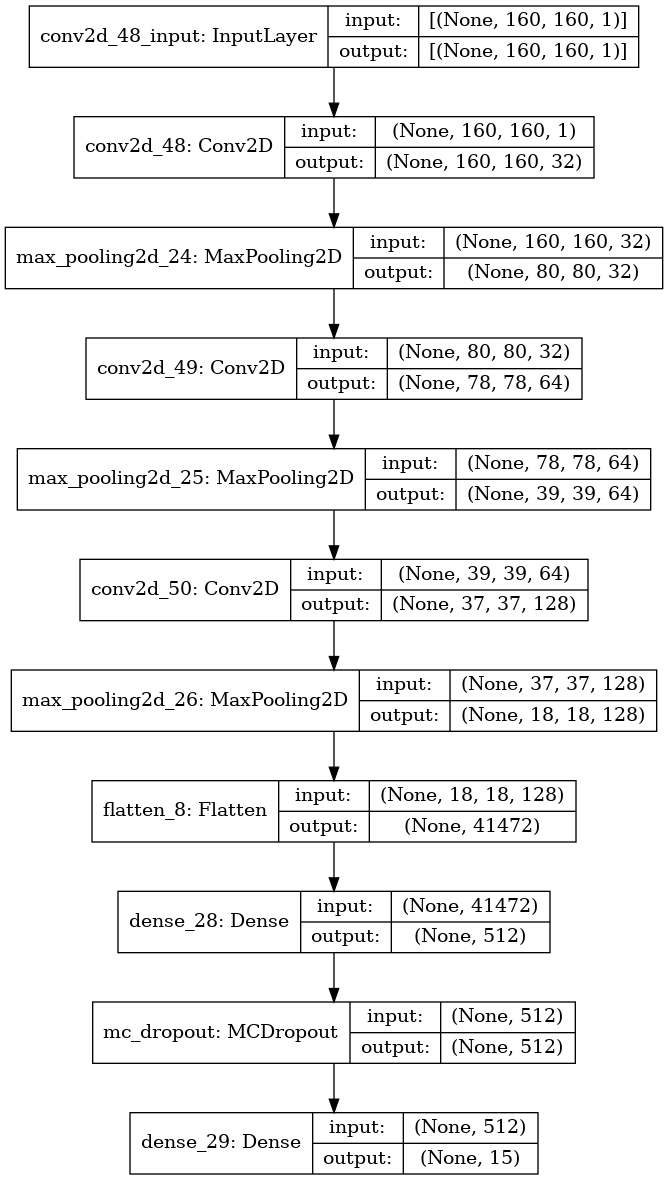

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras import optimizers, losses
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping()

model.compile(
    loss=losses.CategoricalCrossentropy(from_logits=True),
    optimizer=optimizers.Adam(learning_rate=0.0003),
    metrics=["accuracy"]
)

history = model.fit(
    training_generator,
    steps_per_epoch=(NUMBER_OF_TRAINING_IMAGES//BATCH_SIZE ),
    epochs=EPOCHS,
    validation_data=testing_generator,
    shuffle=True,
    validation_steps=(NUMBER_OF_TESTING_IMAGES//BATCH_SIZE),
#     callbacks=[early_stopping]
)

Epoch 1/25


/opt/conda/lib/python3.7/site-packages/keras/backend.py:4847: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`categorical_crossentropy` received `from_logits=True`, but '


6/6 [==============================] - 4s 453ms/step - loss: 13.0665 - accuracy: 0.0583 - val_loss: 11.2362 - val_accuracy: 0.1000
Epoch 2/25
6/6 [==============================] - 2s 402ms/step - loss: 10.2653 - accuracy: 0.1000 - val_loss: 8.9813 - val_accuracy: 0.1333
Epoch 3/25
6/6 [==============================] - 2s 406ms/step - loss: 8.2131 - accuracy: 0.2250 - val_loss: 7.3162 - val_accuracy: 0.1667
Epoch 4/25
6/6 [==============================] - 2s 415ms/step - loss: 6.6801 - accuracy: 0.2917 - val_loss: 6.0057 - val_accuracy: 0.3333
Epoch 5/25
6/6 [==============================] - 3s 494ms/step - loss: 5.5678 - accuracy: 0.3250 - val_loss: 4.9027 - val_accuracy: 0.3000
Epoch 6/25
6/6 [==============================] - 2s 405ms/step - loss: 4.6911 - accuracy: 0.3917 - val_loss: 4.3338 - val_accuracy: 0.4667
Epoch 7/25
6/6 [==============================] - 2s 399ms/step - loss: 4.0437 - accuracy: 0.4917 - val_loss: 3.9233 - val_accuracy: 0.3667
Epoch 8/25
6/6 [============

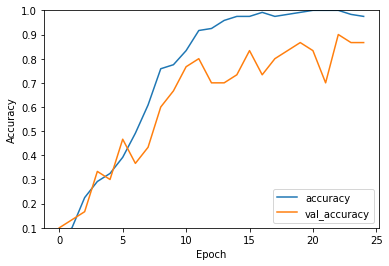

In [ ]:
plot_folder = "plot"
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.1, 1])
plt.legend(loc='lower right')

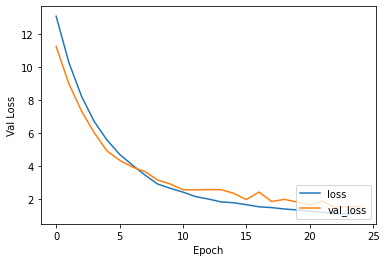

In [ ]:
plot_folder = "plot"
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Val Loss')
plt.legend(loc='lower right')

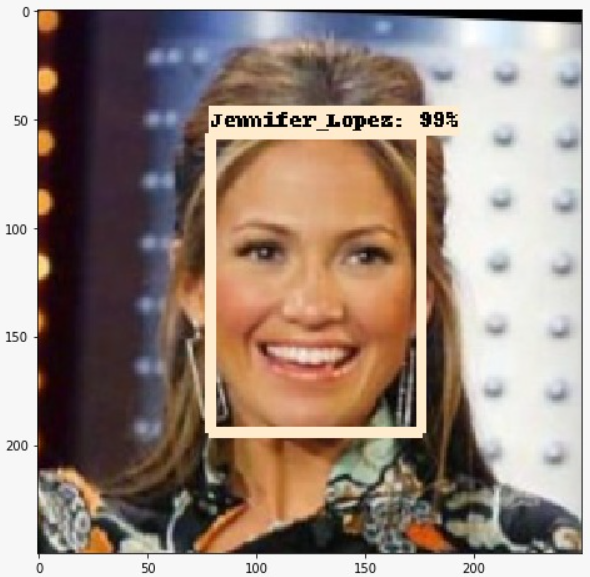

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)
print(classification_report(validation_generator.classes, y_pred))
print(validation_generator.classes)
print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(validation_generator.classes, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         2
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       0.67      1.00      0.80         2
           7       0.67      1.00      0.80         2
           8       1.00      0.50      0.67         2
           9       1.00      0.50      0.67         2
          10       0.67      1.00      0.80         2
          11       1.00      0.50      0.67         2
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         2
          14       1.00      0.50      0.67         2

    accuracy                           0.83        30
   macro avg       0.88      0.83      0.82        30
weighted avg       0.88   

# Results

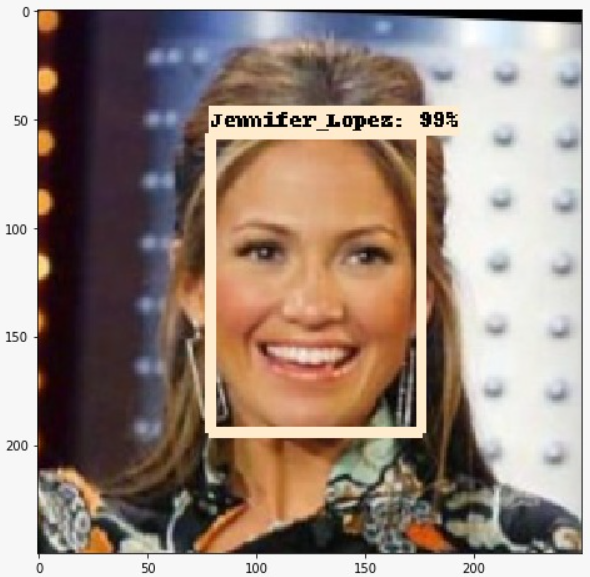